In [10]:
import scipy
print('scipy: %s' % scipy.__version__)
# numpy
import numpy
print('numpy: %s' % numpy.__version__)
# matplotlib
import matplotlib
print('matplotlib: %s' % matplotlib.__version__)
# pandas
import pandas
print('pandas: %s' % pandas.__version__)
# scikit-learn
import sklearn
print('sklearn: %s' % sklearn.__version__)
# statsmodels
import statsmodels
print('statsmodels: %s' % statsmodels.__version__)

scipy: 1.2.1
numpy: 1.16.4
matplotlib: 3.1.0
pandas: 0.24.2
sklearn: 0.21.2
statsmodels: 0.10.0


In [11]:
import pandas as pd
series = pd.read_excel(r'C:\Users\121\Desktop\Calls\Calls7.xlsx', header=0, index_col=0)
split_point = len(series) - 72
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_excel(r'C:\Users\121\Desktop\Calls\dataset.xlsx', index=False)
validation.to_excel(r'C:\Users\121\Desktop\Calls\validation.xlsx', index=False)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# series.head(2)

Dataset 456, Validation 72


In [10]:
import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        # model_fit = model.fit(disp=0)
        model_fit = model.fit(trend='nc', disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    mse = mean_squared_error(test, predictions)
    rmse = sqrt(mse)
    return rmse 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s RMSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
# load dataset
series = pd.read_excel(r'C:\Users\121\Desktop\Calls\Calls7.xlsx', header=0, index_col=0)
# evaluate parameters
p_values = range(0, 5)
d_values = range(0, 3)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)
print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

ARIMA(0, 0, 1) RMSE=22.001
ARIMA(0, 0, 3) RMSE=14.510
ARIMA(0, 1, 1) RMSE=11.402
ARIMA(0, 1, 2) RMSE=11.398
ARIMA(0, 1, 3) RMSE=11.315
ARIMA(0, 1, 4) RMSE=11.349
ARIMA(0, 2, 1) RMSE=11.590
ARIMA(0, 2, 2) RMSE=11.418
ARIMA(1, 0, 0) RMSE=11.433
ARIMA(1, 0, 1) RMSE=11.226
ARIMA(1, 0, 2) RMSE=11.196
ARIMA(1, 0, 3) RMSE=11.042
ARIMA(1, 0, 4) RMSE=11.069
ARIMA(1, 1, 0) RMSE=11.373
ARIMA(1, 2, 0) RMSE=13.131
ARIMA(1, 2, 1) RMSE=11.388
ARIMA(1, 2, 2) RMSE=11.357
ARIMA(1, 2, 3) RMSE=11.385
ARIMA(1, 2, 4) RMSE=11.339
ARIMA(2, 0, 0) RMSE=11.173
ARIMA(2, 0, 1) RMSE=11.079
ARIMA(2, 0, 2) RMSE=11.104
ARIMA(2, 0, 3) RMSE=11.059
ARIMA(2, 1, 0) RMSE=11.354
ARIMA(2, 2, 0) RMSE=12.602
ARIMA(2, 2, 1) RMSE=11.371
ARIMA(2, 2, 2) RMSE=11.373
ARIMA(2, 2, 3) RMSE=11.330
ARIMA(3, 0, 0) RMSE=11.106
ARIMA(3, 0, 1) RMSE=11.093
ARIMA(3, 1, 0) RMSE=11.363
ARIMA(3, 2, 0) RMSE=12.575
ARIMA(3, 2, 1) RMSE=11.378
ARIMA(4, 0, 0) RMSE=11.077
ARIMA(4, 0, 1) RMSE=11.062
ARIMA(4, 0, 2) RMSE=11.239
ARIMA(4, 1, 0) RMSE=11.294
A

NameError: name 'best_cfg' is not defined

In [12]:
# Save model
# model.pkl This is the ARIMAResult object from the call to ARIMA.fit(). 
# This includes the coefficients and all other internal data returned when fitting the model.
# model_bias.npy This is the bias value stored as a one-row, one-column NumPy array.
import pandas as pd
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats import boxcox
import numpy
 
# monkey patch around bug in ARIMA class
def __getnewargs__(self):
    return ((self.endog),(self.k_lags, self.k_diff, self.k_ma))
 
ARIMA.__getnewargs__ = __getnewargs__
 
# load data
series = pd.read_excel(r'C:\Users\121\Desktop\Calls\Calls7.xlsx', header=0, index_col=0)
# prepare data
X = series.values
X = X.astype('float32')
# fit model
model = ARIMA(X, order=(1, 0, 3))
model_fit = model.fit(trend='nc', disp=0)
# bias constant, could be calculated from in-sample mean residual
bias = 1.081624
# save model
model_fit.save(r'C:\Users\121\Desktop\Calls\modelx.pkl')
numpy.save(r'C:\Users\121\Desktop\Calls\model_biasx.npy', [bias])
print('Fit for Calls7.xlsx is ready')

Fit for Calls47.xlsx is ready


In [38]:
# Сам прогноз, длина прогноза = равна длине валидационного списка
import pandas as pd
import numpy as np
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy
# load and prepare datasets
dataset = pd.read_excel(r'C:\Users\121\Desktop\Calls\dataset.xlsx')
X = dataset.values.astype('float32')
history = [x for x in X]
validation = pd.read_excel(r'C:\Users\121\Desktop\Calls\validation.xlsx')
y = validation.values.astype('float32')
#f = open(r'C:\Users\121\Desktop\Calls\Result1.xlsx', 'w')
# load model
model_fit = ARIMAResults.load(r'C:\Users\121\Desktop\Calls\modelx.pkl')
bias = numpy.load(r'C:\Users\121\Desktop\Calls\model_biasx.npy')
# make first prediction
predictions = list()
yhat = bias + float(model_fit.forecast()[0])
predictions.append(yhat)
history.append(y[0])
#print('Predicted=%.1f, Expected=%1.f' % (yhat, y[0]))
# rolling forecasts
sourcefile = open(r'C:\Users\121\Desktop\Calls\777.csv', 'w')
for i in range(1, len(y)):
    # predict
    model = ARIMA(history, order=(1,0,3))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = bias + float(model_fit.forecast()[0])
    predictions.append(yhat)
    print('Predicted=%.1f, Expected=%1.f' % (yhat, obs))
    #observation
    obs = y[i]
    history.append(obs)
    print('>Predicted=%.1f, Expected=%.f' % (yhat, obs), file = sourcefile)
#np.savetxt(r'C:\Users\121\Desktop\Calls\5.csv', [yhat], delimiter=',', fmt='%d')
#np.savetxt(r'C:\Users\121\Desktop\Calls\5.csv', [a], delimiter=',', fmt='%d')
# report performance
#mse = mean_squared_error(y, predictions)
#rmse = sqrt(mse)
#print('RMSE: %.2f' % rmse)
#pyplot.plot(y)
#pyplot.plot(predictions, color='red')
#pyplot.show()

Predicted=3.0, Expected=28
Predicted=-6.1, Expected=0
Predicted=0.8, Expected=0
Predicted=2.7, Expected=0
Predicted=2.1, Expected=0
Predicted=0.5, Expected=0
Predicted=0.7, Expected=0
Predicted=1.1, Expected=0
Predicted=3.5, Expected=2
Predicted=13.3, Expected=11
Predicted=36.5, Expected=32
Predicted=39.9, Expected=36
Predicted=26.1, Expected=27
Predicted=27.0, Expected=31
Predicted=48.2, Expected=48
Predicted=43.9, Expected=42
Predicted=38.6, Expected=40
Predicted=40.2, Expected=44
Predicted=42.5, Expected=44
Predicted=81.2, Expected=78
Predicted=59.3, Expected=59
Predicted=58.2, Expected=62
Predicted=45.3, Expected=53
Predicted=11.2, Expected=18
Predicted=9.3, Expected=16
Predicted=9.5, Expected=12
Predicted=3.5, Expected=2
Predicted=1.8, Expected=2
Predicted=1.9, Expected=2
Predicted=1.2, Expected=0
Predicted=2.2, Expected=1
Predicted=2.0, Expected=1
Predicted=4.3, Expected=3
Predicted=25.1, Expected=22
Predicted=26.4, Expected=23
Predicted=41.8, Expected=39
Predicted=58.6, Expected

RMSE: 11.277


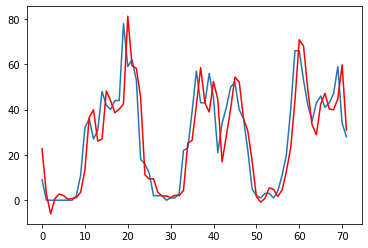

In [39]:
# here is write result on new excel file 
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy
# load and prepare datasets
dataset = pd.read_excel(r'C:\Users\121\Desktop\Calls\dataset.xlsx')
X = dataset.values.astype('float32')
history = [x for x in X]
validation = pd.read_excel(r'C:\Users\121\Desktop\Calls\validation.xlsx')
y = validation.values.astype('float32')
# load model
model_fit = ARIMAResults.load(r'C:\Users\121\Desktop\Calls\modelx.pkl')
bias = numpy.load(r'C:\Users\121\Desktop\Calls\model_biasx.npy')
# make first prediction
predictions = list()
yhat = bias + float(model_fit.forecast()[0])
predictions.append(yhat)
history.append(y[0])
#print('>Predicted=%.3f, Expected=%3.f' % (yhat, y[0]))
# rolling forecasts
sourcefile = open(r'C:\Users\121\Desktop\Calls\777.csv', 'w')
for i in range(1, len(y)):
    # predict
    model = ARIMA(history, order=(1,0,3))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = bias + float(model_fit.forecast()[0])
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)
    print('>Predicted=%.2f, Expected=%.2f' % (yhat, obs), file = sourcefile)
# report performance
mse = mean_squared_error(y, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)
pyplot.plot(y)
pyplot.plot(predictions, color='red')
pyplot.show()